<a href="https://colab.research.google.com/github/MargaretGuy/UK-health-and-happiness/blob/main/Machine_learning_UK_health_and_happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

# Import happiness table from BigQuery

In [2]:
import pandas as pd
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

# Set your Google Cloud project ID
PROJECT_ID = "uk-health-happiness"

# Initialize a BigQuery client
client = bigquery.Client(project=PROJECT_ID)

# Define the full table ID
TABLE_ID = "uk-health-happiness.cleaned_data.Happiness_more_factors_31"

# Query to select all data from the table
query = f"SELECT * FROM `{TABLE_ID}`"

# Run the query and store results in a Pandas DataFrame
df = client.query(query).to_dataframe()

# Display the first few rows of the dataset
df.head()

,Region,avg_min_temp_c1,avg_max_temp_c,total_rain_mm,avg_temp_c,avg_wind_speed_m_s,avg_wind_gust_speed_m_s,avg_dominant_wind_direction,Happiness_Latitude,Happiness_Longitude,...,avg_pop_per_park,median_pop_per_park,nb_flats,nb_flats_with_gardens,avg_garden_size_flats,nb_houses,nb_houses_with_gardens,avg_garden_size_houses,new_low,new_high
0,Norfolk,7.216164,13.756986,644.3,10.529589,25.846849,45.655890,202.200000,52.67,1.00,...,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,24.30,75.70
1,North Yorkshire,6.044384,12.832877,1403.9,9.521918,23.295616,44.159589,211.776712,54.13,-1.50,...,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,25.80,74.21
2,Kent,7.642192,13.818904,637.6,10.793151,22.991507,45.469589,199.961644,51.21,0.72,...,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,27.37,72.63
3,Lancashire,6.130959,11.881644,1301.4,9.098356,22.877808,47.453151,208.098630,53.86,-2.57,...,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,26.40,73.60
4,Worcestershire,6.752192,13.706575,1281.0,10.340137,22.044932,44.469315,206.010959,52.21,-2.16,...,NaN,NaN,<NA>,NaN,NaN,<NA>,<NA>,NaN,25.42,74.58


# Distribution for happiness

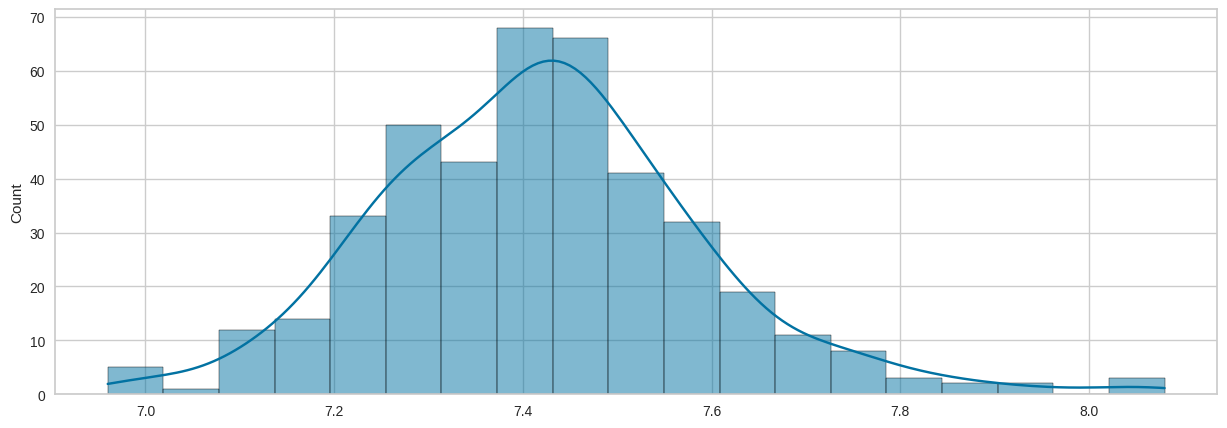

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

average_mean_rating=df['average_mean_rating'].tolist()

# Plot histogram for average mean rating happiness score
plt.figure(figsize=(15,5))
sns.histplot(average_mean_rating, kde=True)
plt.show()

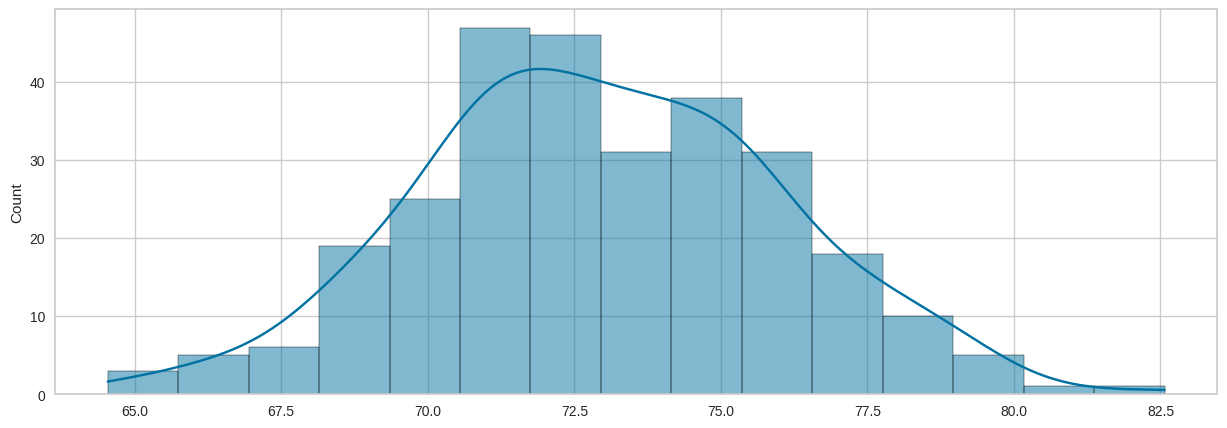

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

new_high=df['new_high'].tolist()

# Plot histogram for high happiness score
plt.figure(figsize=(15,5))
sns.histplot(new_high, kde=True)
plt.show()


# Testing for multicollinearity

In [106]:
#Checking for non values in the columns
df.isnull().sum()

,0
Region,0
avg_min_temp_c1,0
avg_max_temp_c,0
total_rain_mm,0
avg_temp_c,0
avg_wind_speed_m_s,0
avg_wind_gust_speed_m_s,0
avg_dominant_wind_direction,0
Happiness_Latitude,0
Happiness_Longitude,0


Checking VIFs for weather factors

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the variables to check
X = df[['avg_min_temp_c1', 'avg_max_temp_c', 'total_rain_mm',
       'avg_temp_c', 'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s',
       'avg_dominant_wind_direction']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature           VIF
0              avg_min_temp_c1  10524.433978
1               avg_max_temp_c  41610.465368
2                total_rain_mm      8.160090
3                   avg_temp_c  91379.897224
4           avg_wind_speed_m_s    230.574481
5      avg_wind_gust_speed_m_s    693.740123
6  avg_dominant_wind_direction    865.813533


Checking which factors are higly correlated with each other

<Axes: >

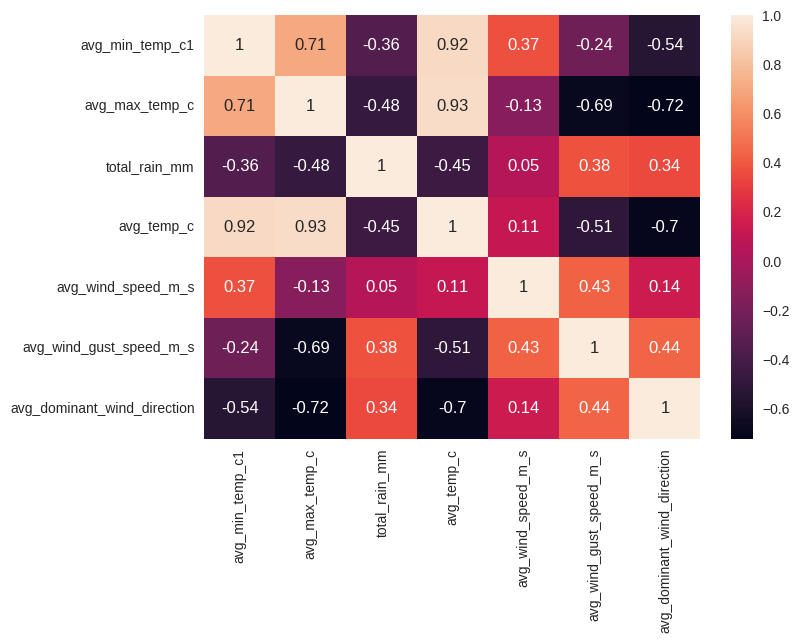

In [108]:
import seaborn as sns

#correlation
df_correlation=df[['avg_min_temp_c1', 'avg_max_temp_c', 'total_rain_mm',
       'avg_temp_c', 'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s',
       'avg_dominant_wind_direction']]


# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

Checking VIFs after removing avg_min_temp_c1 and avg_max_temp_c

In [109]:
# the variables to check
X = df[['total_rain_mm',
       'avg_temp_c', 'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s',
       'avg_dominant_wind_direction']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                       feature         VIF
0                total_rain_mm    7.903005
1                   avg_temp_c   84.597857
2           avg_wind_speed_m_s  161.875420
3      avg_wind_gust_speed_m_s  623.335539
4  avg_dominant_wind_direction  526.954190


Checking which factors are higly correlated with each other

<Axes: >

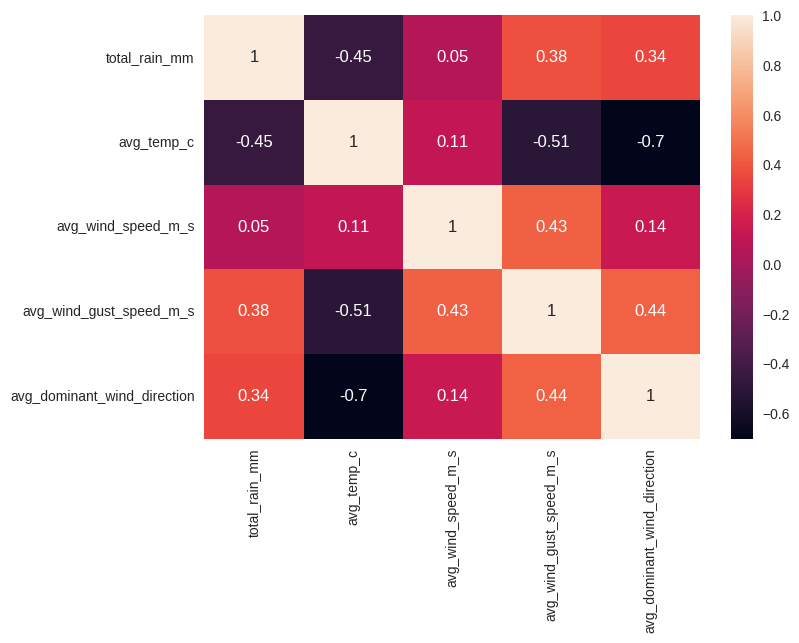

In [110]:
#correlation
df_correlation=df[['total_rain_mm',
       'avg_temp_c', 'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s', 'avg_dominant_wind_direction'
       ]]


# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

Checking VIFs after removing avg_dominant_wind_direction

In [111]:
# the variables to check
X = df[['total_rain_mm',
       'avg_temp_c', 'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                   feature         VIF
0            total_rain_mm    7.875318
1               avg_temp_c   76.053281
2       avg_wind_speed_m_s  160.907290
3  avg_wind_gust_speed_m_s  188.139056


Checking VIFs after removing avg_temp

In [112]:
# the variables to check
X = df[['total_rain_mm',
        'avg_wind_speed_m_s', 'avg_wind_gust_speed_m_s',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                   feature         VIF
0            total_rain_mm    6.703092
1       avg_wind_speed_m_s  143.402397
2  avg_wind_gust_speed_m_s  158.214048


Checking VIFs after removing avg_wind_gust_speed_m_s

In [113]:
# the variables to check
X = df[['total_rain_mm',
        'avg_wind_speed_m_s']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

              feature       VIF
0       total_rain_mm  5.917808
1  avg_wind_speed_m_s  5.917808


Checking VIFs for green spaces and housing factors

In [114]:
#drop missing values
df_green=df[['avg_dist_to_park', 'median_dist_to_park',
       'avg_size_park', 'median_size_park', 'avg_nb_parks_within_1000m',
        'avg_pop_per_park',
       'median_pop_per_park',
       'nb_flats_with_gardens',
       'avg_garden_size_flats',
       'avg_garden_size_houses']].dropna()

# the independent variables set
X = df_green[[ 'avg_dist_to_park', 'median_dist_to_park',
       'avg_size_park', 'median_size_park', 'avg_nb_parks_within_1000m',
        'avg_pop_per_park',
       'median_pop_per_park',
       'nb_flats_with_gardens',
       'avg_garden_size_flats',
       'avg_garden_size_houses']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature        VIF
0           avg_dist_to_park  12.524487
1        median_dist_to_park  11.148270
2              avg_size_park   1.557112
3           median_size_park   1.364680
4  avg_nb_parks_within_1000m   4.238845
5           avg_pop_per_park  23.897826
6        median_pop_per_park  20.774507
7      nb_flats_with_gardens   2.659536
8      avg_garden_size_flats  18.341805
9     avg_garden_size_houses  18.103514


Checking which factors are higly correlated with each other

<Axes: >

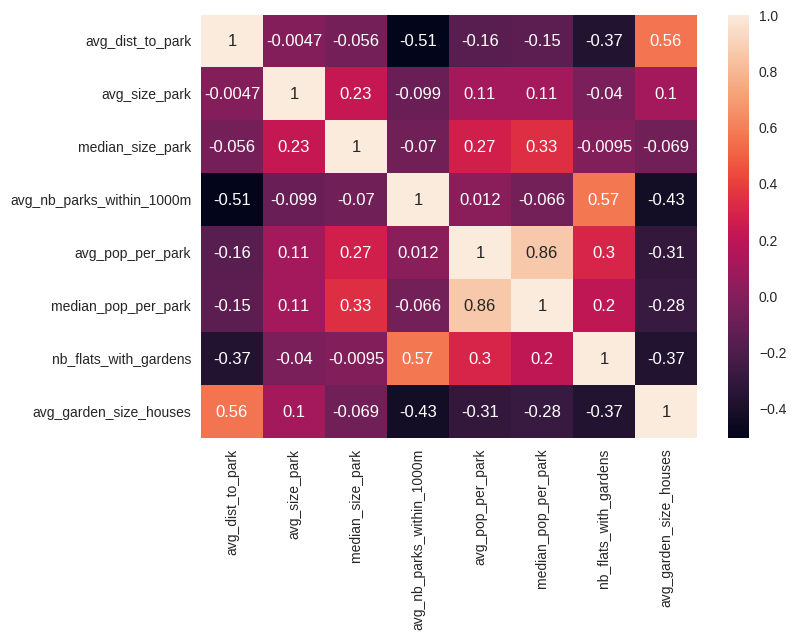

In [115]:
#correlation
df_correlation=df[[ 'avg_dist_to_park',
       'avg_size_park', 'median_size_park', 'avg_nb_parks_within_1000m',
        'avg_pop_per_park',
       'median_pop_per_park',
       'nb_flats_with_gardens',
       'avg_garden_size_houses']]



# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

Checking VIFs for green spaces and housing factors after removing median_pop_per_park

In [116]:
# the independent variables set
X = df_green[[ 'avg_dist_to_park',
       'avg_size_park', 'median_size_park', 'avg_nb_parks_within_1000m',
        'avg_pop_per_park',
       'nb_flats_with_gardens',
       'avg_garden_size_flats',
       ]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0           avg_dist_to_park  6.249500
1              avg_size_park  1.524649
2           median_size_park  1.304668
3  avg_nb_parks_within_1000m  4.071100
4           avg_pop_per_park  4.583910
5      nb_flats_with_gardens  2.605527
6      avg_garden_size_flats  7.578723


Checking VIFs for more green spaces and housing factors

In [117]:
#drop missing values
df_parks=df[['median_nb_parks_within_1000m', 'population',
        'nb_flats', 'nb_houses', 'nb_houses_with_gardens']].dropna()

# the independent variables set
X = df_parks[['median_nb_parks_within_1000m', 'population',
        'nb_flats', 'nb_houses', 'nb_houses_with_gardens']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

X = X.astype(float)


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                        feature          VIF
0  median_nb_parks_within_1000m     2.643305
1                    population   166.467256
2                      nb_flats    19.685664
3                     nb_houses  4471.706558
4        nb_houses_with_gardens  4377.597936


Checking which factors are higly correlated with each other

<Axes: >

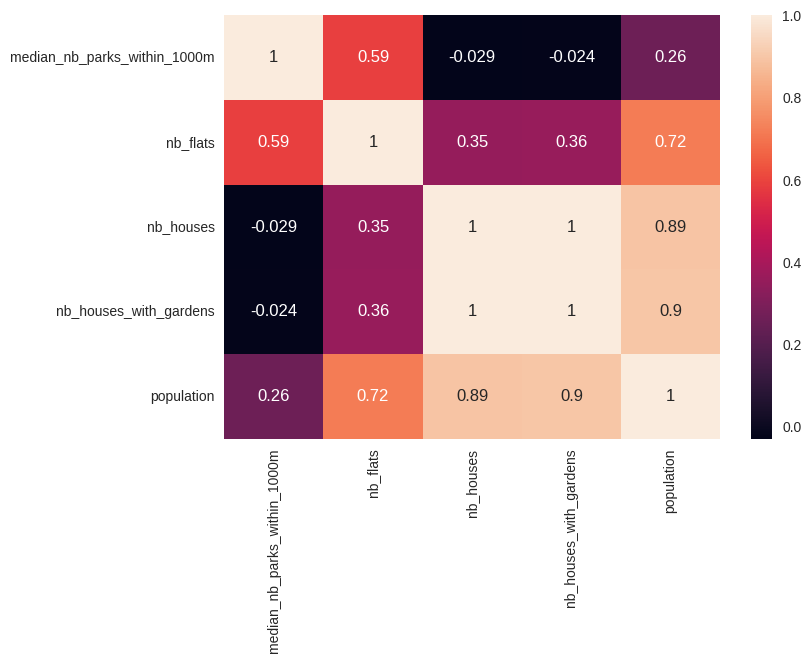

In [118]:
#correlation
df_correlation=df[['median_nb_parks_within_1000m',
        'nb_flats', 'nb_houses', 'nb_houses_with_gardens', 'population']]



# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

Checking VIFs after removing nb_houses and nb_houses_with_gardens

In [119]:
# the independent variables set
X = df_parks[['median_nb_parks_within_1000m',
        'nb_flats', 'population']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

X = X.astype(float)


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                        feature       VIF
0  median_nb_parks_within_1000m  2.616058
1                      nb_flats  3.793156
2                    population  3.350201


Checking VIFs for pollution factors

In [120]:
#drop missing values
df_pollution=df[['WaterPollution', 'AirQuality']].dropna()

# the independent variables set
X = df_pollution[['WaterPollution', 'AirQuality']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

          feature       VIF
0  WaterPollution  1.889737
1      AirQuality  1.889737


Checking VIFs for average cats and dogs per household

In [121]:
#drop missing values
df_pollution=df[['average_cats_per_household', 'average_dogs_per_household']].dropna()

# the independent variables set
X = df_pollution[['average_cats_per_household', 'average_dogs_per_household']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                      feature  VIF
0  average_cats_per_household  inf
1  average_dogs_per_household  inf


Checking VIFs for all factors

In [122]:
#drop missing values
df_all=df[['WaterPollution', 'AirQuality',
            'median_nb_parks_within_1000m',
            'nb_flats', 'population',
            'avg_dist_to_park',
            'avg_size_park', 'median_size_park',
            'avg_nb_parks_within_1000m',
            'avg_pop_per_park',
            'nb_flats_with_gardens',
            'avg_garden_size_flats',
            'total_rain_mm',
            'avg_wind_speed_m_s',
            'average_cats_per_household'
            ]].dropna()

# the independent variables set
X = df_all[['WaterPollution', 'AirQuality',
            'median_nb_parks_within_1000m',
            'nb_flats', 'population',
            'avg_dist_to_park',
            'avg_size_park', 'median_size_park',
            'avg_nb_parks_within_1000m',
            'avg_pop_per_park',
            'nb_flats_with_gardens',
            'avg_garden_size_flats',
            'total_rain_mm',
            'avg_wind_speed_m_s',
            'average_cats_per_household'
        ]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                         feature         VIF
0                 WaterPollution    7.606474
1                     AirQuality   28.204182
2   median_nb_parks_within_1000m   30.462718
3                       nb_flats  224.710435
4                     population   21.647397
5               avg_dist_to_park   38.235994
6                  avg_size_park    6.093332
7               median_size_park    5.195868
8      avg_nb_parks_within_1000m   51.111661
9               avg_pop_per_park   27.658229
10         nb_flats_with_gardens  147.967741
11         avg_garden_size_flats   19.941802
12                 total_rain_mm   16.442841
13            avg_wind_speed_m_s  189.938274
14    average_cats_per_household   11.827128


Checking which factors are highly correlated with eachother

<Axes: >

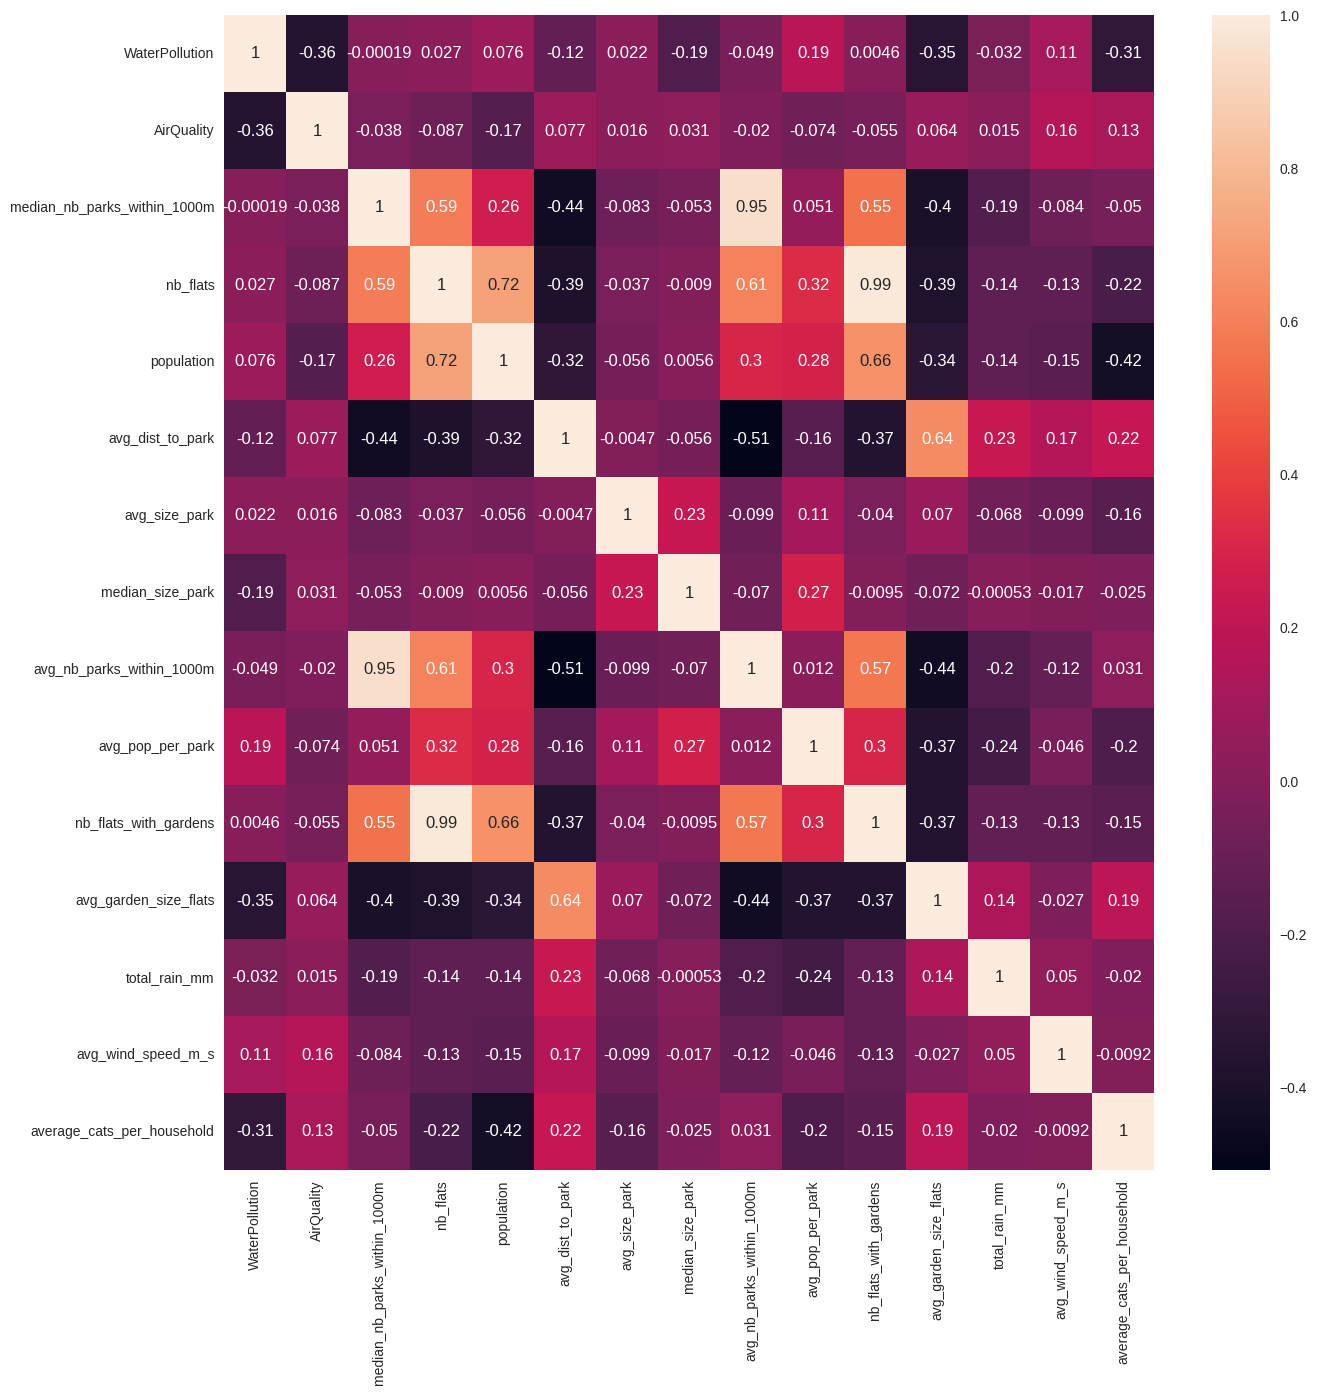

In [123]:
#correlation
df_correlation=df[['WaterPollution',
                   'AirQuality',
                   'median_nb_parks_within_1000m',
                   'nb_flats',
                   'population',
                   'avg_dist_to_park',
                   'avg_size_park',
                   'median_size_park',
                   'avg_nb_parks_within_1000m',
                   'avg_pop_per_park',
                   'nb_flats_with_gardens',
                   'avg_garden_size_flats',
                   'total_rain_mm',
                   'avg_wind_speed_m_s',
                   'average_cats_per_household']]

#setting the size of the correlation matrix
fig, ax = plt.subplots(figsize=(15,15))



# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)



Checking VIFs after removing the most correlated factors

In [124]:
#drop missing values
df_all=df[['WaterPollution',
           'AirQuality',
           'nb_flats',
           'population',
           'avg_dist_to_park',
           'avg_size_park',
           'median_size_park',
           'avg_nb_parks_within_1000m',
           'avg_pop_per_park',
           'total_rain_mm',
           'avg_wind_speed_m_s'
            ]].dropna()

# the independent variables set
X = df_all[['WaterPollution',
            'AirQuality',
            'nb_flats',
            'population',
            'avg_dist_to_park',
            'avg_size_park',
            'median_size_park',
            'avg_nb_parks_within_1000m',
            'avg_pop_per_park',
            'total_rain_mm',
            'avg_wind_speed_m_s'
        ]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                      feature        VIF
0              WaterPollution   3.595150
1                  AirQuality  13.595115
2                    nb_flats   4.358511
3                  population   7.332403
4            avg_dist_to_park   6.693843
5               avg_size_park   2.498321
6            median_size_park   3.363936
7   avg_nb_parks_within_1000m  12.991308
8            avg_pop_per_park  15.997594
9               total_rain_mm  13.708437
10         avg_wind_speed_m_s  85.131116


Checking VIFs after removing avg_wind_speed_m_s

In [125]:
#drop missing values
df_all=df[['WaterPollution',
           'AirQuality',
           'nb_flats',
           'population',
           'avg_dist_to_park',
           'avg_size_park',
           'median_size_park',
           'avg_nb_parks_within_1000m',
           'avg_pop_per_park',
           'total_rain_mm',
            ]].dropna()

# the independent variables set
X = df_all[['WaterPollution',
            'AirQuality',
            'nb_flats',
            'population',
            'avg_dist_to_park',
            'avg_size_park',
            'median_size_park',
            'avg_nb_parks_within_1000m',
            'avg_pop_per_park',
            'total_rain_mm',
        ]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                     feature        VIF
0             WaterPollution   3.284713
1                 AirQuality  10.391929
2                   nb_flats   4.221267
3                 population   7.255548
4           avg_dist_to_park   4.945922
5              avg_size_park   2.484417
6           median_size_park   3.339878
7  avg_nb_parks_within_1000m   6.862518
8           avg_pop_per_park  11.189264
9              total_rain_mm  10.556612


Checking VIFs after removing AirQuality

In [126]:
#drop missing values
df_all=df[['WaterPollution',
            'nb_flats',
            'population',
            'avg_dist_to_park',
            'avg_size_park',
            'median_size_park',
            'avg_nb_parks_within_1000m',
            'total_rain_mm'
            ]].dropna()

# the independent variables set
X = df_all[['WaterPollution',
            'nb_flats',
            'population',
            'avg_dist_to_park',
            'avg_size_park',
            'median_size_park',
            'avg_nb_parks_within_1000m',
            'total_rain_mm'
        ]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


X = X.astype(float)

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature       VIF
0             WaterPollution  2.509036
1                   nb_flats  4.208957
2                 population  6.829592
3           avg_dist_to_park  4.208971
4              avg_size_park  2.328422
5           median_size_park  2.408725
6  avg_nb_parks_within_1000m  5.392152
7              total_rain_mm  9.146270


# Linear regression

Assign X and Y

In [128]:
X = df[['total_rain_mm',
        'avg_wind_speed_m_s',
        'avg_dist_to_park',
        'avg_size_park',
        'median_size_park',
        'avg_pop_per_park',
        'nb_flats_with_gardens',
        'avg_garden_size_flats',
        'median_nb_parks_within_1000m',
        'nb_flats',
        'population',
        'WaterPollution',
        'AirQuality',
        'average_cats_per_household'
        ]]
y=df['average_mean_rating']


# Combine X and y into a single DataFrame, then drop rows where y is NaN
df_clean = pd.concat([X, y], axis=1).dropna()

# Separate X and y again
X_clean = df_clean.drop(columns=['average_mean_rating'])
y_clean = df_clean['average_mean_rating']


Train-test-split

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48, 14), (17, 14), (48,), (17,))

Scaling

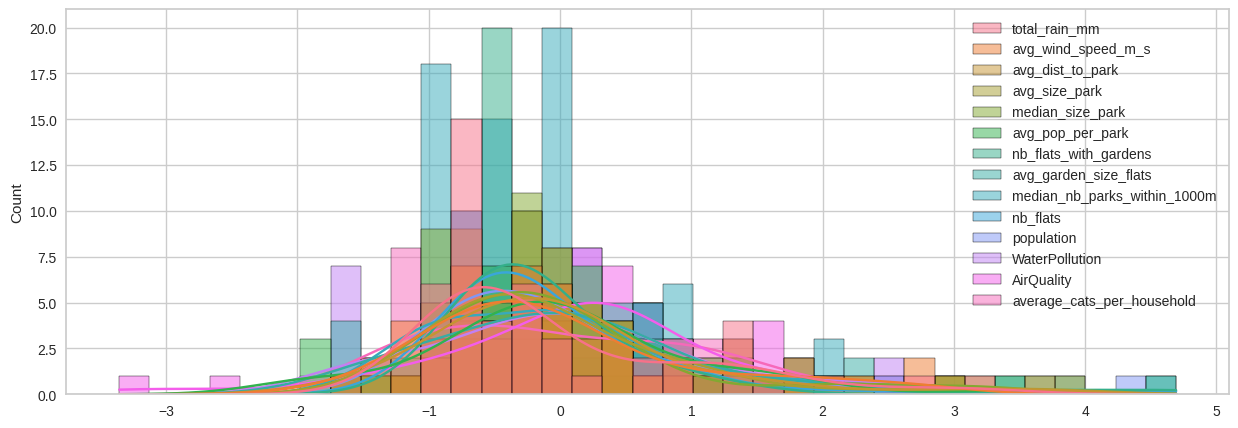

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Training and transforming X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

#Transforming X_train
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

plt.figure(figsize=(15,5))
sns.histplot(X_train_scaled, kde=True)
plt.show()


In [131]:
from sklearn.linear_model import LinearRegression
#instantiated our model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

R2 score on the test data

In [132]:
lin_reg.score(X_test_scaled,y_test)

0.22368497547987853

# Classification pycarat

In [133]:
"""
Creating a happiness rating based on the 'new_high' column.

The happiness rating is assigned as follows:
- 1: Low number of happy people (lower half of the data)
- 2: High number of happy people (upper half of the data)

"""
df['happiness_rating'] = pd.qcut(df['new_high'], q=2, labels=['1', '2'])

In [225]:
#Creating a dataset with te factors to be included in the model
columns_to_keep =  ['total_rain_mm',
                    #'avg_wind_speed_m_s' -removed second lowest in feature plot,
                    #'avg_dist_to_park' -removed first not in feature plot,
                    'avg_size_park',
                    #'median_size_park', #-removed third,
                    'avg_pop_per_park',
                    'nb_flats_with_gardens',
                    'avg_garden_size_flats',
                    'median_nb_parks_within_1000m',
                    #'nb_flats' -removed first not in feature plot,
                    'population',
                    #'WaterPollution' -removed first not in feature plot,
                    #'AirQuality' -removed first not in feature plot,
                    'Region',
                    #'average_cats_per_household -removed first not in feature plot,
                    'happiness_rating'
        ]

dataset = df[columns_to_keep]

In [226]:
#remove nulls from happiness_rating column
dataset.dropna(subset=["happiness_rating"], inplace=True)

In [227]:
from pycaret.classification import setup

# Setting up the PyCaret classification model
xp = setup(data = dataset,
           target = "happiness_rating",
           train_size=0.8,
           normalize = True,
           session_id = 42)


,Description,Value
0,Session id,42
1,Target,happiness_rating
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(286, 9)"
5,Transformed data shape,"(286, 9)"
6,Transformed train set shape,"(228, 9)"
7,Transformed test set shape,"(58, 9)"
8,Numeric features,7
9,Categorical features,1


In [228]:
from pycaret.classification import compare_models

#test which model is most accurate
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7097,0.7561,0.7097,0.7296,0.7049,0.4207,0.4386,0.0670
knn,K Neighbors Classifier,0.6666,0.7059,0.6666,0.6749,0.6639,0.3348,0.3417,0.0750
ridge,Ridge Classifier,0.5360,0.7488,0.5360,0.5263,0.4258,0.1027,0.1554,0.0650
svm,SVM - Linear Kernel,0.5346,0.5479,0.5346,0.5506,0.5138,0.0628,0.0792,0.0720
lightgbm,Light Gradient Boosting Machine,0.5174,0.5138,0.5174,0.2678,0.3529,0.0000,0.0000,0.1940
lda,Linear Discriminant Analysis,0.5099,0.5405,0.5099,0.3112,0.3742,0.0545,0.0555,0.0600
qda,Quadratic Discriminant Analysis,0.5087,0.3000,0.5087,0.2591,0.3432,0.0000,0.0000,0.0620
nb,Naive Bayes,0.5008,0.5322,0.5008,0.3016,0.3654,0.0364,0.0368,0.0900
xgboost,Extreme Gradient Boosting,0.5000,0.5000,0.5000,0.2504,0.3336,0.0000,0.0000,0.1350
et,Extra Trees Classifier,0.4998,0.6222,0.4998,0.4233,0.3611,0.0005,0.0023,0.2140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [229]:
from pycaret.classification import tune_model

#Tune the best model
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7826,0.8485,0.7826,0.8011,0.7775,0.5594,0.5800
1,0.7391,0.8409,0.7391,0.7391,0.7391,0.4773,0.4773
2,0.7826,0.8030,0.7826,0.7839,0.7818,0.5627,0.5649
3,0.8261,0.8712,0.8261,0.8261,0.8261,0.6515,0.6515
4,0.4783,0.5227,0.4783,0.4816,0.4763,-0.0376,-0.0382
5,0.7391,0.7045,0.7391,0.7754,0.7331,0.4851,0.5165
6,0.9130,0.9773,0.9130,0.9130,0.9130,0.8258,0.8258
7,0.6522,0.6136,0.6522,0.6595,0.6509,0.3083,0.3130
8,0.6818,0.6860,0.6818,0.7292,0.6645,0.3636,0.4082


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [230]:
best_model_tuned.get_params()

{'C': 0.431,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

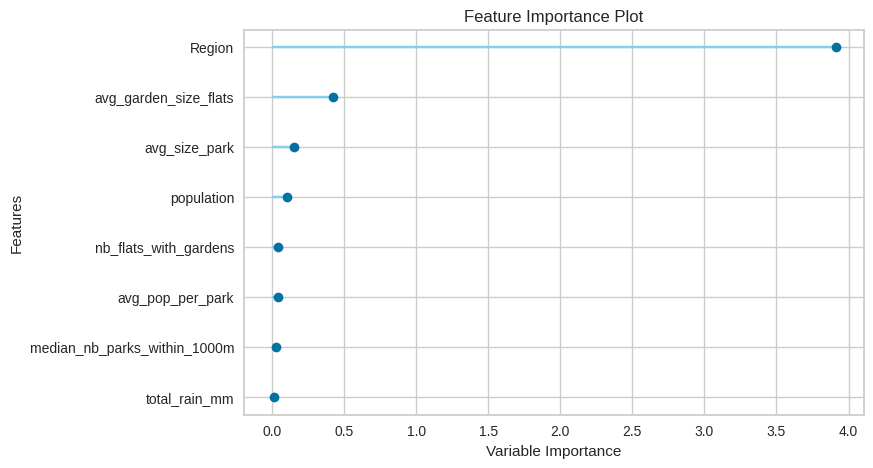

In [231]:
from pycaret.classification import plot_model

#Plot feature importance plot
plot_model(best_model, plot='feature')